# 非線形関数のフィッティング

今回は
$$
f(x) = x^2 + \tanh(x) + \cos(\pi x)
$$
を近似する。

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

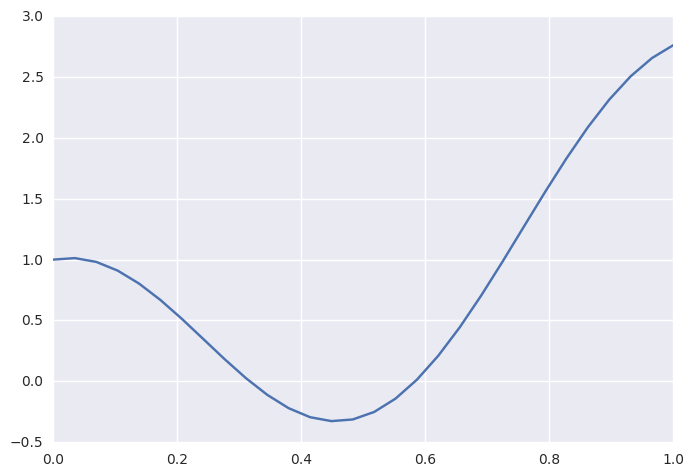

In [2]:
def ans(x):
    return x**2 + np.tanh(x) + np.cos(x * np.pi * 2)
    #return x**2

x = np.linspace(0, 1, 30)
y = ans(x)
plt.plot(x, y)

バッチを取得する関数

In [3]:
def get_batch(n=10):
    x = np.random.rand(n).reshape(-1, 1)
    y = ans(x)
    return x, y

In [4]:
get_batch(2)

(array([[ 0.82575856],
        [ 0.70770672]]), array([[ 1.81830122],
        [ 0.84746554]]))

## ネットワークの構造

今回は２層で実装する。活性化関数はReLU、出力関数は高等関数。

```
Input [1] -> [1, 16] -> ReLU -> [16, 32] -> ReLU -> [32, 1] Output
```

In [5]:
import tensorflow as tf

In [6]:
sess = tf.InteractiveSession()

In [7]:
x = tf.placeholder(tf.float32, shape=[None, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

第一層

In [8]:
def leaky_relu(x, alpha=0.2):
    return tf.maximum(alpha * x, x)
    #return tf.nn.relu(x)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [9]:
W1 = weight_variable([1, 16])
b1 = bias_variable([16])
h1 = leaky_relu(tf.matmul(x, W1) + b1)

第二層

In [10]:
W2 = weight_variable([16, 32])
b2 = bias_variable([32])
h2 = leaky_relu(tf.matmul(h1, W2) + b2)

第三層

In [11]:
W3 = weight_variable([32, 1])
b3 = bias_variable([1])
y = tf.matmul(h2, W3) + b3

誤差関数は二乗誤差

In [12]:
nbatch = 100
square_error = tf.reduce_sum(tf.pow(y - y_, 2) / 2 / nbatch)

In [13]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(square_error)

In [14]:
# 変数の初期化
sess.run(tf.global_variables_initializer())

In [15]:
def predict(xdata, y):
    return y.eval(feed_dict={x: xdata.reshape(-1, 1)}).reshape(-1)

In [16]:
err_hist = []
for i in range(1000):
    # バッチ
    xdata, ydata = get_batch(nbatch)
    train_step.run(feed_dict={x: xdata, y_: ydata})
    
    serr = square_error.eval(feed_dict={x: xdata, y_: ydata})
    sortedx = np.sort(xdata)
    err_hist.append(serr)
    if i % 100 == 0:
        print(serr)

0.400522
0.169554
0.0565528
0.016339
0.00631322
0.0474008
0.0137731
0.00940583
0.0152986
0.00379776


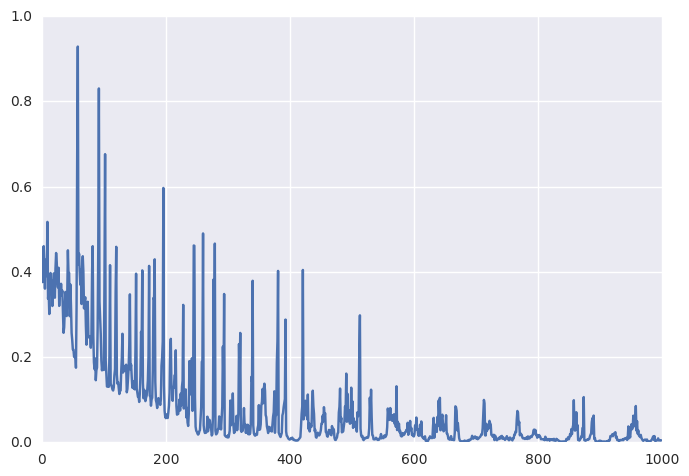

In [17]:
plt.plot(err_hist)

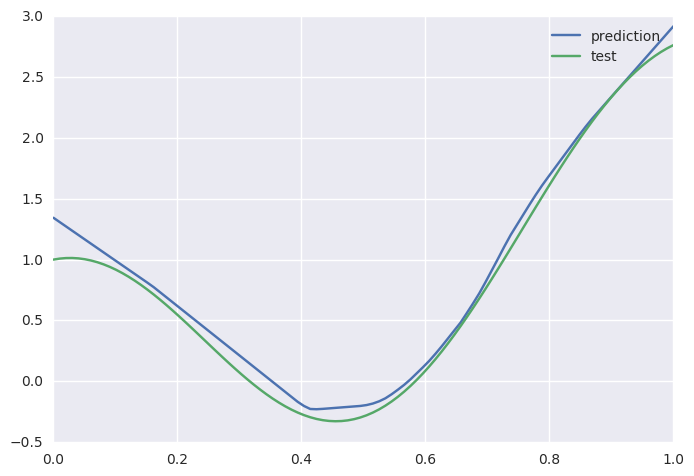

In [18]:
xdata = np.linspace(0, 1, 100)
plt.plot(xdata, predict(xdata, y), label="prediction")
plt.plot(xdata, ans(xdata), label="test")
plt.legend()